<img src="img/unicamp.png" height="128" width="128">
<h1><center>Métricas de Similaridade e Dissimilaridade entre Imagens</center></h1>  
<h3><center>Apresentado por: Kauê Tartarotti Nepomuceno Duarte</center></h3>  

Neste notebook serão apresentadas métricas para geração da similaridade entre imagens. O notebook basicamente se norteia na definição de conceitos, quais são as principais métricas de similaridade e distância(dissimilaridade) e três aplicações nas quais o uso de similaridade é importante. 

Boa leitura

#### Inicialização

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from skimage.measure import compare_ssim as ssim
import warnings
warnings.filterwarnings('ignore')
import itertools


im_25 = Image.open('img/moedas/25centavos.jpg')
r25,g25,b25 = im_25.split()
r25,g25,b25 = np.array(r25)/1.,np.array(g25)/1.,np.array(b25)/1.
#floatr, floatg, floatb = np.array(r)/255.0, np.array(g)/255.0, np.array(b)/255.0


im_10 = Image.open('img/moedas/10centavos.jpg')
r10,g10,b10 = im_10.split()
r10,g10,b10 = np.array(r10),np.array(g10),np.array(b10)

def normalizar(imagem,minNovo=0,maxNovo=255):
    l,c = imagem.shape
    max = np.max(imagem.ravel())
    min = np.min(imagem.ravel())
    if max==min:
        return imagem
    else:
        imagem = minNovo + (maxNovo - minNovo) *((imagem.ravel() - min)/(max-min))
        return imagem.reshape((l,c))


<h2><center>Conteúdo</center></h2>  

<p><div class="lev1 toc-item"><a href="#Conceito" data-toc-modified-id="Conceito"><span class="toc-item-num">1&nbsp;&nbsp;</span>Conceito</a></div><div class="lev2 toc-item"><a href="#Formulação-Matemática---Similaridade" data-toc-modified-id="Formulação-Matemática---Similaridade"><span class="toc-item-num">&emsp;1.1&nbsp;&nbsp;</span>Formulação Matemática - Similaridade</a></div><div class="lev2 toc-item"></div><a href="#Formulação-Matemática---Dissimilaridade" data-toc-modified-id="Formulação-Matemática---Dissimilaridade"><span class="toc-item-num">&emsp;1.2&nbsp;&nbsp;</span>Formulação Matemática - Dissimilaridade</a></div><div class="lev2 toc-item"></div>

<p><div class="lev1 toc-item"><a href="#Métricas-de-Similaridade" data-toc-modified-id="Métricas-de-Similaridade"><span class="toc-item-num">2&nbsp;&nbsp;</span>Métricas de Similaridade</a></div><div class="lev2 toc-item"><a href="#Coeficiente-de-Correlação-de-Pearson" data-toc-modified-id="Coeficiente-de-Correlação-de-Pearson"><span class="toc-item-num">&emsp;2.1&nbsp;&nbsp;</span>Coeficiente de Correlação de Pearson</a></div><div class="lev2 toc-item"></div><a href="#Tanimoto" data-toc-modified-id="Tanimoto"><span class="toc-item-num">&emsp;2.2&nbsp;&nbsp;</span>Tanimoto</a></div><div class="lev2 toc-item"></div><a href="#Stochastic-Sign-Change" data-toc-modified-id="Stochastic-Sign-Change"><span class="toc-item-num">&emsp;2.3&nbsp;&nbsp;</span>Stochastic Sign Change</a></div><div class="lev2 toc-item"></div><a href="#Deterministic-Sign-Change" data-toc-modified-id="Deterministic-Sign-Change"><span class="toc-item-num">&emsp;2.4&nbsp;&nbsp;</span>Deterministic Sign Change</a></div><div class="lev2 toc-item"></div><a href="#Minimum-Ratio" data-toc-modified-id="Minimum-Ratio"><span class="toc-item-num">&emsp;2.5&nbsp;&nbsp;</span>Minimum Ratio</a></div><div class="lev2 toc-item"></div><a href="#Spearman-Rho" data-toc-modified-id="Spearman-Rho"><span class="toc-item-num">&emsp;2.6&nbsp;&nbsp;</span>Spearman Rho</a></div><div class="lev2 toc-item"></div><a href="#Kendall's-Thau" data-toc-modified-id="Kendall's-Thau"><span class="toc-item-num">&emsp;2.7&nbsp;&nbsp;</span>Kendall's Thau</a></div><div class="lev2 toc-item"></div><a href="#Shannon-Mutual-Information" data-toc-modified-id="Shannon-Mutual-Information"><span class="toc-item-num">&emsp;2.8&nbsp;&nbsp;</span>Shannon Mutual Information</a></div><div class="lev2 toc-item"></div><a href="#Renyi-Mutual-Information" data-toc-modified-id="Renyi-Mutual-Information"><span class="toc-item-num">&emsp;2.9&nbsp;&nbsp;</span>Rényi Mutual Information</a></div><div class="lev2 toc-item"></div><a href="#Tsallis-Mutual-Information" data-toc-modified-id="Tsallis-Mutual-Information"><span class="toc-item-num">&emsp;2.10&nbsp;&nbsp;</span>Tsallis Mutual Information</a></div><div class="lev2 toc-item"></div><a href="#Structural-Similarity" data-toc-modified-id="Structural-Similarity"><span class="toc-item-num">&emsp;2.11&nbsp;&nbsp;</span>Structural Similarity</a></div>












<p><div class="lev1 toc-item"><a href="#Métricas-de-Dissimilaridade" data-toc-modified-id="Métricas-de-Dissimilaridade"><span class="toc-item-num">3&nbsp;&nbsp;</span>Métricas de Dissimilaridade</a></div><div class="lev2 toc-item"><a href="#Soma-da-Diferença-Absoluta" data-toc-modified-id="Soma-da-Diferença-Absoluta"><span class="toc-item-num">&emsp;3.1&nbsp;&nbsp;</span>Soma da Diferença Absoluta</a></div><div class="lev2 toc-item"></div><div class="lev2 toc-item"><a href="#Mediana-da-Diferença-Absoluta(MAD)" data-toc-modified-id="Mediana-da-Diferença-Absoluta(MAD)"><span class="toc-item-num">&emsp;3.2&nbsp;&nbsp;</span>Mediana da Diferença Absoluta(MAD)</a></div><div class="lev2 toc-item"></div><div class="lev2 toc-item"><a href="#Soma-do-Quadrado-da-Diferença" data-toc-modified-id="Soma-do-Quadrado-da-Diferença"><span class="toc-item-num">&emsp;3.3&nbsp;&nbsp;</span>Soma do Quadrado da Diferença</a></div><div class="lev2 toc-item"></div><div class="lev2 toc-item"><a href="#Mediana-do-Quadrado-da-Diferença(MSD)" data-toc-modified-id="Mediana-do-Quadrado-da-Diferença(MSD)"><span class="toc-item-num">&emsp;3.4&nbsp;&nbsp;</span>Mediana do Quadrado da Diferença(MSD)</a></div><div class="lev2 toc-item"></div><div class="lev2 toc-item"><a href="#Normalized-Square-L_2-Norm" data-toc-modified-id="Normalized-Square-L_2-Norm"><span class="toc-item-num">&emsp;3.5&nbsp;&nbsp;</span>Normalized Square $L_2$ Norm</a></div><div class="lev2 toc-item"></div><div class="lev2 toc-item"><a href="#Intensity-Ratio-Variance" data-toc-modified-id="Intensity-Ratio-Variance"><span class="toc-item-num">&emsp;3.6&nbsp;&nbsp;</span>Intensity-Ratio Variance</a></div><div class="lev2 toc-item"><a href="#Erro-Quadratico-Medio-(MSE)" data-toc-modified-id="Erro-Quadratico-Medio-(MSE)"><span class="toc-item-num">&emsp;3.7&nbsp;&nbsp;</span>Erro Quadrático Médio (MSE)</a></div><div class="lev2 toc-item"><a href="#Chi-Squared" data-toc-modified-id="Chi-Squared"><span class="toc-item-num">&emsp;3.8&nbsp;&nbsp;</span>Chi Squared</a></div>










<p><div class="lev1 toc-item"><a href="#Aplicação" data-toc-modified-id="Aplicação"><span class="toc-item-num">4&nbsp;&nbsp;</span>Aplicação</a></div><div class="lev2 toc-item"><a href="#Ranqueamento-da-Doença-de-Alzheimer" data-toc-modified-id="Ranqueamento-da-Doença-de-Alzheimer"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Ranqueamento da Doença de Alzheimer</a></div><div class="lev2 toc-item"></div><a href="#Avaliação-das-Métricas-Propostas" data-toc-modified-id="Avaliação-das-Métricas-Propostas"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Avaliação das Métricas Propostas</a></div><div class="lev2 toc-item"></div><a href="#Avaliação-das-Métricas-Propostas---Similaridade" data-toc-modified-id="Avaliação-das-Métricas-Propostas---Similaridade"><span class="toc-item-num">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</span>Avaliação das Métricas Propostas - Similaridade</a></div><div class="lev2 toc-item"></div><a href="#Avaliação-das-Métricas-Propostas---Dissimilaridade" data-toc-modified-id="Avaliação-das-Métricas-Propostas---Dissimilaridade"><span class="toc-item-num">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</span>Avaliação das Métricas Propostas - Dissimilaridade</a></div>




<p><div class="lev1 toc-item"><a href="#Referências" data-toc-modified-id="Referências"><span class="toc-item-num">5&nbsp;&nbsp;</span>Referências</a></div>

<h2><center>Conceito</center></h2>

Dada duas sequências $X=\{x_i:i=1,...,n\}$ e $Y=\{y_i:i=1,...,n\}$. A similaridade ou dissimilaridade entre elas é uma métrica que quantifica a dependencia, ou independencia delas. Ao se tratar de imagens,$X$ e $Y$ representam as imagens rasterizadas, ou seja, em uma representação não mais em 2D, mas sim e 1D.


### Formulação Matemática - Similaridade

Uma métrica de similaridade S será considerada uma métrica se os valores obtidos por ela aumentaram conforme as imagens passam a ser mais parecidas. Em outras palavras, elas serão métricas se e somente se cumprirem todas as quatro sentenças.


1. Intervalo Definido: $S(X,Y) <= S_0$, sendo $S_0$ o maior valor de similaridade da métrica
2. Reflexividade: $S(X,Y) = S_0$, se e somente se $X=Y$
3. Simetria: $S(X,Y) = S(Y,X)$
4. Inequidade Triangular: $S(X,Y)S(Y,Z) <= [Z(X,Y)+S(Y,Z)]S(X,Z)$

### Formulação Matemática - Dissimilaridade

Uma métrica de dissimilaridade, ou distância, D será considerada uma métrica se o valor mais alto corresponder ao índice de menor correspondencia entre as imagens X e Y. Além disso, assim como na similaridade, a dissimilaridade deve seguir todas as seguintes proposições:

1. Não Negatividade: $D(X,Y) >= 0$
2. Reflexividade: $D(X,Y) = 0$, se e somente se $X=Y$
3. Simetria: $D(X,Y) = D(Y,X)$
4. Inequidade Triangular: $D(X,Y)+D(Y,Z) >= D(X,Z)$


<h2><center>Métricas de Similaridade</center></h2>

<h3><center>Coeficiente de Correlação de Pearson</center></h3> 

A correlação entre $X$ e $Y$ é definida por:

<center>$\Large r = \frac {\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})} {\sqrt{\sum_{i=1}^n(x_i-\bar{x})^2} \sqrt{\sum_{i=1}^n(y_i-\bar{y})^2}}$</center>

A correlação $r$ varia de -1 até 1, no qual 1 é determinado como correlação perfeitamente positiva, e -1 a correlação perfeitamente negativa. O coeficiente de Pearson é eficiente como métrica de similaridade que requer um número pequeno de adições e multiplicações pixel a pixels. 

##### Implementação



In [2]:
def pearson(i_a,i_b):
    return np.corrcoef((i_a.ravel(),i_b.ravel()))[0,1]

##### Teste de Conceito

In [3]:
a = np.array([[1, 0], [1, 1]])
b = np.array([[4, 1], [2, 2]])


pearson(a,b)



0.6622661785325219

##### Aplicação em Imagens

In [4]:
im_25  = np.array(Image.open('img/moedas/25centavos.jpg').convert('L'))
im_25C = np.array(Image.open('img/moedas/25centavosCrop.jpg').convert('L'))

pearson(im_25,im_25C)

0.88064177058965332

Nota-se, no exemplo acima, que nós obtemos a chamada Matriz de Similaridade, no qual cada linha corresponde a uma imagem, da mesma forma que a coluna.

<h3><center>Tanimoto</center></h3>  

A métrica Tanimoto é proporcional ao produto das matrizes X e Y e inversamente proporcional a soma do quadrado da distância euclidiana entre X e Y com o produto de X e Y. Nesta métrica, algumas considerações devem ser ressaltadas:

1. Ao realizar a soma do quadrado da distância euclidiana entre X e Y, o efeito é relativamente parecido com o produto dos desvios padrão de X e Y. 
2. Adicionar o produto de X e Y no denominador tem o mesmo efeito que normalizar X e Y.

<center>$\Large S_T = \frac {X^tY} {||X||^2+||Y||^2-X^tY}$</center>

##### Implementação

In [5]:
def tanimoto(I_1,I_2,returnImage=False):
    pq = I_1*I_2
    I_12 = I_1**2
    I_22 = I_2**2
    retorno = (pq / (I_12 + I_22 - pq))  
    retorno[np.isnan(retorno)]=0
    if returnImage:
        return normalizar(retorno,0,255)
    else:
        return np.sum(retorno)

##### Teste de Conceito

In [6]:
a = np.array([[4, 1], [1, 1]])
b = np.array([[4, 1], [2, 3]])
tanimoto(a,b)

3.0952380952380949

##### Aplicação em Imagens

Diferença entre as imagens:  487714.00228


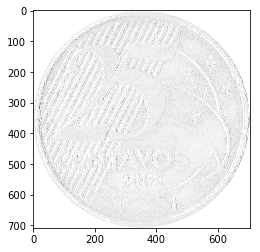

In [7]:
plt.imshow(tanimoto(r25,g25,True),cmap='gray')
print('Diferença entre as imagens: ',tanimoto(r25,g25))

<h3><center>Stochastic Sign Change</center></h3>

Dada imagens $X$ e $Y$, sendo $Y$ a representação da imagem $X$ com ruídos, a imagem diferença $D=\{x_i-y_i:i=1,...,n\}$, sendo $n$ o total de pixels da imagem. $D$ contará as diferenças, positivas ou negativas, da imagem devido a informações ruídosas. O número de mudanças pode ser utilizado como uma métrica de similaridade entre as imagens. Para tanto, na literatura é comum encontrar as diferenças iguais a 0 ($X=Y$), assim significando que, em uma mesma localidade da imagem, pixels possuem uma mesma intensidade e, portanto, possuem uma similaridade graças a isso.



##### Implementação

In [8]:
def ssC (I_1,I_2,returnImage=False):
    if returnImage:
        return abs(I_1-I_2)
    else:
        return np.bincount((abs(I_1-I_2).ravel().astype('uint8')))[0]

##### Teste de Conceito

In [9]:
ia = np.array([[2,3,3],[4,3,1]])
ib = np.array([[4,2,1],[1,3,1]])

print(ssC(ia,ia))


6


##### Aplicação em Imagens

64.0
Similaridade entre as imagens:  94852


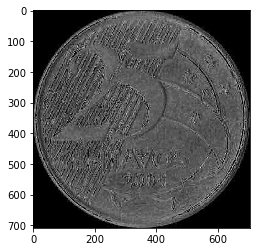

In [10]:
print(np.max(ssC(r25,g25,True)))
plt.imshow(ssC(r25,g25,True),cmap='gray')
print('Similaridade entre as imagens: ',ssC(r25,b25))

<h3><center>Deterministic Sign Change</center></h3>  

Esta métrica é uma generalização da $Stochastic Sign Change$, com a adição de informações ruidosas na imagem $X$. De forma simplificada, dada uma imagem $X$, uma imagem $Z$ será gerada, através da seguinte função:

<center>$\Large z_i = x_i + q(-1)^i$</center>

No qual $q$ representa a intensidade do ruído sendo aplicado. Assim, a imagem diferença $D$ passa a ser computado por $D = \{z_i-y_i:i=1,...,n\}$, sendo $n$ a quantidade de pixels na imagem. Algumas características devem ser levadas em consideração:
1. Da mesma forma que no modelo anterior, a diferença 0 ($X=y$) pode ser utilizada como contabilizador de similaridade.
2. O valor de $q$ pode ser arbitrário (levando em considerações características das imagens) ou obtido por treinamento utilizando o set da imagens.

##### Implementação

In [11]:
def dsC(I_1,I_2,q=1,returnImage=False):
    aux = np.arange(0,len(I_1.ravel())).reshape(I_1.shape)
    z = I_1+(q*((-1)**aux))
    if returnImage:
        return normalizar(abs(z-I_2),0,255)
    else:
        return np.bincount((abs(z.astype('uint8')-I_2.astype('uint8')).ravel()))[0]

##### Teste de Conceito

In [12]:
ia = np.array([[2,3,3],[4,3,1]])
ib = np.array([[4,2,1],[1,3,1]])

dsC(ia,ia,1,True)


array([[1, 1, 1],
       [1, 1, 1]])

##### Aplicação em Imagens

Similaridade entre as imagens:  1628


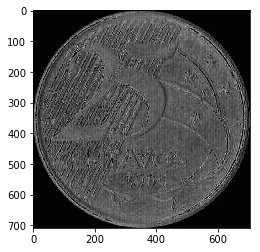

In [13]:
plt.imshow(dsC(r25,g25,1,True),cmap='gray')
print('Similaridade entre as imagens: ',dsC(r25,b25,1))

<h3><center>Minimum Ratio</center></h3>  

Dada uma imagem ruidosa $Y=\{y_i:i=1,...,n\}$ de $X=\{x_i:i=1,...,n\}$, a amplitude do ruído é proporcional a força do sinal, então temos $r_i = min\{\frac{y_i}{x_i},\frac{x_i}{y_i}\}$, para assim calcularmos:

<center>$\Large m_r = \frac {1}{n} \sum^n_{i=1}r_i$</center>

Imagens sem ruído e iguais terão similaridade $m_r=1$. Entretanto, com $X$ e $Y$ diferentes, o valor da divisão de $r_i$ será bem diferente. Obviamente, quanto maior a proximidade das imagens, mais perto de 1 será o valor da similaridade. Apesar da técnica ser resistente a ruído, a diferença de intensidade por afetar a métrica com, por exemplo, uma mesma imagens com luminâncias distintas.

##### Implementação

In [14]:
def min_ratio(I_1,I_2,returnImage=False):
    d1 = I_1.ravel()/I_2.ravel()
    d2 = I_2.ravel()/I_1.ravel()
    d1[np.isnan(d1)]=0
    d2[np.isnan(d2)]=0
    r = np.min((d1,d2),axis=0).reshape(I_1.shape)
    if returnImage:
        return normalizar(r)
    else:
        return np.mean(r)

##### Teste de Conceito

In [15]:
ia = np.array([[2,3,3],[4,3,1]])
ib = np.array([[4,2,1],[1,1,4]])

print(min_ratio(ia,ib,True))

[[ 153.  255.   51.]
 [   0.   51.    0.]]


##### Aplicação em Imagens

Similaridade entre as imagens:  0.877615521667


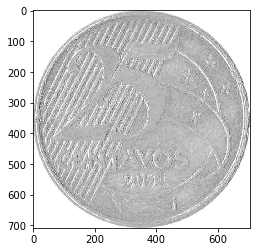

In [16]:
plt.imshow(min_ratio(r25,g25,True),cmap='gray')
print('Similaridade entre as imagens: ',min_ratio(g25,r25))

<h3><center>Spearman Rho</center></h3>   

Dada uma imagem no qual as intensidades não possuem empate, elas podem ser ordenadas da menor para a maior. Desta forma, os pixels serão rotulados de acordo com sua posição no ranking, no qual cada posição $i$ terá um valor $R_i$ vinculado. 

<center>$\Large \rho = 1 - \frac{6\sum_{i=1}^n[R(x_i)-R(y_i)]^2}{n(n^2-1)}$</center>

$R(x_i)$ e $R(y_i)$ representam a lista ranqueada das imagens $X$ e $Y$, respectivamente. Na tentativa de evitar empates em intensidades discretas, as imagens são suavizadas pela aplicação de um filtro gaussiano com um baixo desvio padrão, assim produzindo pontos flutuantes distintos. $\rho$ é uma métrica menos sensível a pontos fora da curva, ou seja, menos sensível a ruídos ou oclusões. 

##### Implementação

In [17]:
def spRho(i_a,i_b):
    return spearmanr(i_a.ravel(),i_b.ravel())[0]

##### Teste de Conceito

In [18]:
from scipy.stats import spearmanr
import numpy as np

ia = np.array([[2,3,3],[4,3,0]])
ib = np.array([[4,2,1],[1,1,4]])

print(spRho(ia,ib))
#print(rho)

-0.852573586519


##### Aplicação em Imagens

In [19]:
[corr,p_value] = spearmanr(g25.ravel(),r25.ravel())
print('Similaridade entre as imagens: ',corr)

Similaridade entre as imagens:  0.985649189184


<h3><center>Kendall's Tau</center></h3>

Se as posições correspondentes das imagens $X$ e $Y$ mostrar diferença na intensidade dos pixels, então duas possibilidades de substituição serão elencadas: Concordância: $sign(x_j − x_i) = sign(y_j − y_i)$ ou Discordância: $sign(x_j − x_i)=−sign(y_j − y_i)$. Em caso de haver um alto número de pares com intesidade correspondente, então haverá mais concordantes do que discordantes, implicando que $X$ e $Y$ alteram com uma mesma frequência. Portanto, dado que $N_c$ e $N_d$ representam a quantidade de pares concordantes e discordantes, a fórmula de Kendall's Tau será calculada da seguinte forma:

<center>$\Large \tau = \frac{N_c-N_d}{n(n-1)/2}$</center>

##### Implementação

In [20]:
def tau(i_a,i_b):
    return kendalltau(i_a, i_b)[0]

##### Teste de Conceito

In [21]:
from scipy.stats import kendalltau
ia = np.array([[2,3,3],[4,3,0]])
ib = np.array([[4,2,1],[1,1,4]])

tau(ia,ib)

-0.78334945180064031

##### Aplicação em Imagens

In [22]:
[corr,p_value] = kendalltau(g25.ravel(),r25.ravel())
print('Similaridade entre as imagens: ',corr)


Similaridade entre as imagens:  0.923018904197


<h3><center>Shannon Mutual Information</center></h3>

Antes de iniciar falando sobre esta métrica, é importante estabelecer um termo, chamado $Joint Probability Distribution-JPD$. JPD de uma imagem corresponde a probabilidade $p$ de ocorrência de um pixels, calculado pelo seu histograma, dividido pela quantidade de pixels da imagem. Desta forma obtendo: 

$p_i = h_i/n:i=1,...,255$

Sendo $h_i$ o histograma da imagem $X$ na posição $i$.

<center>$\Large S_{MI}=\sum_{i=0}^{255}\sum_{j=0}^{255} p_{ij} log_2 \frac{p_{ij}}{p_ip_j}$</center>

Ou também, outra forma de interpretar esta fórmula, através da decomposição do logaritmo, e também utilizada na implementação é:

<center>$\Large S_{MI}= -\sum_{i=0}^{255} p_{i} log_2 {p_i}-\sum_{j=0}^{255} p_{j} log_2 p_j+\sum_{i=0}^{255}\sum_{j=0}^{255} p_{ij} log_2 p_{ij}$</center>


##### Implementação

In [23]:
def probability(Ia,Ib):
    hist_a = np.bincount(Ia.ravel().astype('uint8'))
    hist_b = np.bincount(Ib.ravel().astype('uint8'))
    
    #remove colunas com 0, não afetará em nada a probabilidade
    hist_a = hist_a[hist_a!=0]
    hist_b = hist_b[hist_b!=0]
    hist_a = hist_a/len(Ia.ravel())
    #print(hist_a)
    hist_b = hist_b/len(Ib.ravel())

    p = np.zeros((len(hist_a),len(hist_b)))
    for i in range(len(hist_a)):
        for j in range(len(hist_b)):
            p[i,j] = hist_a[i]*hist_b[j]
            
    return hist_a,hist_b,p


def shannon_entropy(prob):
        pi = prob*np.log2(prob)
        pi[np.isnan(pi)] = 0
        #print('pi*prob:',pi)
        
        return -np.sum(pi) 

def shannon_mutual(Ia,Ib):    
    [pi,pj,pij] = probability(Ia,Ib)
    spi, spj, spij=shannon_entropy(pi),shannon_entropy(pj),shannon_entropy(pij)
    #print(spi,spj,spij)
    vari = +spij
    return vari

#shannon_mutual(b25,r25)

##### Teste de Conceito


In [24]:
ia = np.array([[2,3,3],[2,3,0]])
ib = np.array([[1,3,0],[1,3,2]])


print(shannon_mutual(ib,ia))


3.37744375108


##### Aplicação em Imagens

In [25]:
print(shannon_mutual(r25,r25))

12.3037643327


<h3><center>Rényi Mutual Information</center></h3>

A Rényi Mutual Information é definida através da entropia de Rényi. Basicamente, ela pode ser interpretada como uma generalização da Shannon Mutual Information. Dada uma ordem $\alpha$ de uma probabilidade finita. Podemos definir a entropia de Rényi atravpes da seguinte fórmula. 

<center>$\Large E_\alpha = \frac{1}{1-\alpha}log_2(\sum^{255}_{i=0}p_i^\alpha)$</center>

Entretanto, conforme $\alpha$ se aproxima de 1, a fórmula de Rényi se aproxima da fórmula de Shannon. Normalmente, o valor de $\alpha$ é definido em um intervalo que mantenha verdadeira a seguinte inequação: $log_2(p_{max}) <= E_\alpha <= log_2(256)$, no qual $p_{max}= max_{i=0}^{255}(p_i)$. Assim, para realização do cálculo da Rényi Mutual Information, temos a seguinte fórmula:

<center>$\Large R_\alpha = \frac{E_\alpha^i+E_\alpha^j}{E^{ij}_\alpha}$</center>

Conforme o valor da ordem $\alpha$ aumenta, a probabilidade do JPD com altos valores serão amplificadas, desta forma reduzindo o efeito dos pontos fora da curva que possivelmente tenham afetado os histogramas.

##### Implementação

In [26]:
def renyi_entropy(p,alfa):
    return (1./(1.-alfa))*np.log2(np.sum(p**alfa))

def renyi_mutual(Ia,Ib,alfa=5):
    [pi,pj,pij] = probability(Ia,Ib)
    [ri,rj,rij] = renyi_entropy(pi,alfa),renyi_entropy(pj,alfa),renyi_entropy(pij,alfa)
    return rij


 

##### Aplicação em Imagens

In [27]:
print(renyi_mutual(r25,b25,5))

5.69594762147


<h3><center>Tsallis Mutual Information</center></h3>

Assim como a Rényi Mutual Information, Tsallis pode ser interpretada como uma fórmula genérica da Shannon Mutual Information, desde que o valor de ordem $q$ se aproxime de 1. A fórmula para obtenção desta métrica é exemplificado abaixo:

<center>$\Large S_q = \frac{1}{q-1}(1-\sum^{255}_{i=0}\sum^{255}_{j=0}p_{ij}^q)$</center>

<center>$\Large R_q = S_q^i+S_q^j+(1-q)S_q^iS_q^j-S_q$</center>

Entretanto, a entropia de Tsallis reduz a importância dos outliers do que a entropia de Rényi conforme o valor de $q$ aumenta. Desta forma, esta métrica pode ser interpretada como menos sensível a ruídos na imagem comparado com as duas métricas anteriores. Assim como Rényi, esta métrica é muito custosa por causa da substituição do logaritmo por quantidades excessivas de multiplicações de ordem $q$.

##### Implementação

In [28]:
def tsallis_entropy(p,q=2.7):
    if len(p.shape)>1:
        return (1/(q-1))*(1-np.sum(p**q))
    else:
        return (1/(q-1))*(np.sum(p*(1-p**(q-1))))

def tsallis_mutual(Ia,Ib,q=2.7):
    [pi,pj,pij] = probability(Ia,Ib)
    [ti,tj,tij] = tsallis_entropy(pi,q),tsallis_entropy(pj,q),tsallis_entropy(pij,q)
    return ti+tj+((1-q)*ti*tj)-tij

##### Aplicação em Imagens

In [29]:

tsallis_mutual(b25,b25,3)



0.0

<h3><center>Structural Similarity</center></h3>

Está métrica é um modelo baseado em mudanças perceptiveis na informação estrutural da imagem. De forma diferente das métricas que buscam apenas o erro absoluto, como o MSE e o PSNR, a SS utiliza informações de luminancia e contraste focando que os pixels tem uma relação forte interdepentente principalmente quando estão próximos.   

$\Large SS(x,y) = \frac {(2\mu_x\mu_y + c_1)(2\sigma{xy}+c_2)} {(\mu_x^2+\mu_y^2+c_1)(\sigma_x^2+\sigma_y^2+c_2)}$

$\mu_x$ representa a média de $x$, $\mu_y$ representa a média de $y$, $\sigma_x$ representa a variância de $x$,$\sigma_y$ representa a variância de $y$, $c_1=(k_1*L)^2$, $c_2=(k_2*L)^2$ ($c_1$ e $c_2$ são responsáveis por auxiliar na divisão), $k_1$=0.01, $k_2$=0.03, $L=2^{\#bits por pixel}-1$  

##### Implementação 

Disponível na Toolbox SkImage

##### Teste de Conceito

In [30]:
ia = np.array([[2,3,2,5],[3,2,1,6],[2,5,3,2],[7,6,4,3]])
ib = np.array([[5,2,6,7],[2,3,7,2],[7,8,4,3],[1,3,6,8]])
ssim(ib,ia,3)

0.999999999999998

##### Aplicação em Imagens

In [31]:
valor = ssim(g25,r25)
print(valor)

0.932502134902


<h2><center>Métricas de Dissimilaridade</center></h2> 

<h3><center>Soma da Diferença Absoluta</center></h3>
Também conhecida como distância de Manhattan ou $L_1 Norm$, é uma das distâncias mais antigas utilizadas na comparação de imagens. Ela pode ser calculada conforme a seguinte equação:

<center>$\Large L_1 = \sum_{i=1}^n|x_i-y_i|$</center>


In [32]:
def l1_norm(I_1,I_2,returnImage=False):
    if returnImage:
        return normalizar(np.abs(I_1-I_2))
    else:
        return np.sum(np.abs(I_1-I_2))

##### Teste de Conceito

In [33]:
ia = np.array([[2,3],[4,3]])
ib = np.array([[4,2],[1,1]])

print(l1_norm(ia,ib))

8


##### Aplicação em Imagem

Diferença entre as imagens:  27046806.0


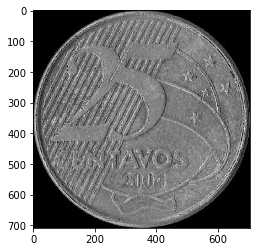

In [34]:
plt.imshow(l1_norm(r25,b25,True),cmap='gray')
print('Diferença entre as imagens: ',l1_norm(r25,b25))

<h3><center>Mediana da Diferença Absoluta(MAD)</center></h3>  

Quando existe muito ruído na imagem (salt-and-pepper, por exemplo). A métrica $L_1$ produz um valor exagerado. Assim, ao realizar a $L_1$ em imagens é o mesmo que computar a diferença da média absoluta. E se, ao invés de realizar a média, fosse realizado uma mediana? Segundo Goshtasby isso reduziria ruídos na imagem. Basicamente, o cálculo é realizado conforme a equação abaixo:

<center>$\Large MAD = median^n_{i=1}|x_i-y_i|$</center>

##### Implementação

In [35]:
def mad(I_1,I_2,returnImage=False):
    if returnImage:
        return normalizar(np.abs(I_1-I_2))
    else:
        return np.median(np.abs(I_1-I_2))

##### Teste de Conceito

In [36]:
ia = np.array([[2,3],[4,3]])
ib = np.array([[4,2],[1,1]])

print(mad(ia,ib))

2.0


##### Aplicação em Imagem

Diferença entre as imagens:  66.0


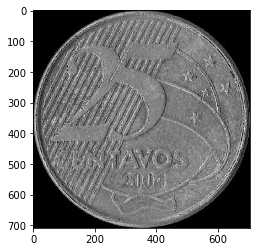

In [37]:
plt.imshow(mad(r25,b25,True),cmap='gray')
print('Diferença entre as imagens: ',mad(r25,b25))

<h3><center>Soma do Quadrado da Diferença</center></h3>  

Também conhecida como $L_2 Norm$ e Distância Euclidiana ao Quadrado, esta métrica visa enfatizar as maiores diferenças na imagem. Ou seja, caso ocorra uma diferença muito grande, ela receberá um peso maior na contagem das diferenças. Comparado com a Correlação de Pearson, essa métrica é mais sensível a magnitude das diferenças na imagem.

<center>$\Large L_2^2 = \sum_{i=1}^{n}(x_i-y_i)^2$</center>


##### Implementação 

In [38]:
def l2_norm(I_1,I_2,returnImage=False):
    if returnImage:
        return normalizar((I_1-I_2)**2)
    else:
        return np.sum((I_1-I_2)**2)

##### Teste de Conceito

In [39]:
ia = np.array([[2,3],[4,3]])
ib = np.array([[4,2],[1,1]])

print(l2_norm(ia,ib))

18


##### Aplicação em Imagens

Diferença entre as imagens:  206101867.0


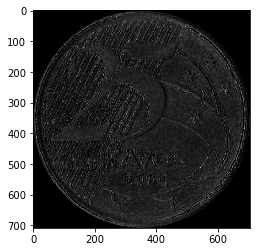

In [40]:
plt.imshow(l2_norm(r25,g25,True),cmap='gray')
print('Diferença entre as imagens: ',l2_norm(r25,g25))

<h3><center>Mediana do Quadrado da Diferença(MSD)</center></h3>   

Considerada uma versão mais robusta da $L_2 Norm$. Quando uma das imagens está cheia de ruído, ou com regiões oclusas, a influência deste ruído e oclusão é reduzida pela descarte da metade das maiores diferenças da imagem. Entretanto, se uma imagem não possui ruído ou oclusões, então é melhor aplicar a $L_2 Norm$.

<center>$\Large MSD = median_{i=1}^{n}(x_i-y_i)^2$</center>

##### Implementação

In [41]:
def msd(I_1,I_2,returnImage=False):
    if returnImage:
        return normalizar((I_1-I_2)**2)
    else:
        return np.median((I_1-I_2)**2)

##### Teste de Conceito

In [42]:
ia = np.array([[2,3],[4,3]])
ib = np.array([[4,2],[1,1]])

print(msd(ia,ib))



4.0


##### Aplicação em Imagens

Diferença entre as imagens:  4356.0


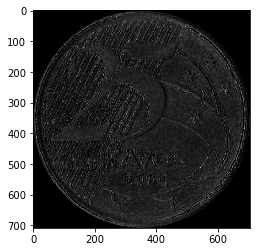

In [43]:
plt.imshow(msd(r25,g25,True),cmap='gray')
print('Diferença entre as imagens: ',msd(b25,r25))

<h3><center>Normalized Square $L_2$ Norm</center></h3>   


Quando se aplica a Correlação de Pearson, o valor utilizado para o cálculo são os da imagem normalizada utilizando a média da intensidade. Isso permite que a correlação seja invariante a bias. Esse valor basicamente realiza um produto entre as intensidades normalizadas da imagem com o seu desvio padrão. 

<center>$\Large \sigma_x = \sqrt{\frac{1}{n}\sum^n_{i=1}(x_i-\bar{x})^2}$</center>

<center>$\Large \sigma_y = \sqrt{\frac{1}{n}\sum^n_{i=1}(y_i-\bar{y})^2}$</center>

<center>$\Large Normalized L^2_2 = \sum^n_{i=1}(\frac{x_i-\bar{x}}{\sigma{x}}-\frac{y_i-\bar{y}}{\sigma{y}})^2$</center>

##### Implementação

In [44]:
def norm_l22(I_1,I_2,returnImage=False):
    sigma_I1 = np.sqrt(np.mean((I_1-np.mean(I_1))**2))
    sigma_I2 = np.sqrt(np.mean((I_2-np.mean(I_2))**2))
    if returnImage:
        return normalizar((((I_1-np.mean(I_1))/sigma_I1)-((I_2-np.mean(I_2))/sigma_I2))**2)
    else:
        return np.sum((((I_1-np.mean(I_1))/sigma_I1)-((I_2-np.mean(I_2))/sigma_I2))**2)

##### Teste de Conceito

In [45]:
ia = np.array([[2,3],[4,3]])
ib = np.array([[4,2],[1,1]])

print(norm_l22(ia,ib))



14.9282032303


##### Aplicações em Imagens

Diferença entre as imagens:  8634.2222572


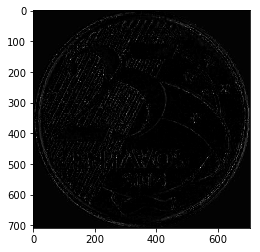

In [46]:
plt.imshow(norm_l22(r25,g25,True),cmap='gray')
print('Diferença entre as imagens: ',norm_l22(r25,g25))

<h3><center>Intensity-Ratio Variance</center></h3>   

Se as intensidades de uma imagem são correspondentes em escala com as intensidades de uma outra imagem, então a relação de correspondência das intensidades no domínio da imagem será constante. Se, por exemplo, duas imagens são obtidas com uma mesma perspectiva em horários diferentes do dia, esta métrica pode detectar fielmente o nível de dissimilaridade entre elas. O modo de obtenção da Variância com relação a Intensidade é definido abaixo:

<center>$\Large r_i = (x_i+\epsilon)/(y_i+\epsilon)$</center>

<center>$\Large R_V = \frac{1}{n}\sum^n_{i=1}(r_i-\bar{r})^2$</center>

Apesar de ser invariante a diferenças de escalas entre intensidades das imagens, essa métrica é sensível a mudanças aditivas na imagem, como ruídos por exemplo. 

##### Implementação

In [47]:
def intRatioVariance(I_1,I_2,epsilon=1,returnImage=False):
    l,c = I_1.shape
    r = (I_1+epsilon)/(I_2+epsilon)
    if returnImage:
        rv = normalizar((r-np.mean(r))**2/(l*c))
    else:    
        rv = np.sum((r-np.mean(r))**2)/(l*c)
    return rv

##### Teste de Conceito

In [48]:
ia = np.array([[2,3],[4,0]])
ib = np.array([[4,2],[1,1]])
rv = intRatioVariance(ia,ib,1)
print(rv)

0.638333333333


##### Aplicações em Imagens

Diferença entre as imagens:  0.00910541954909


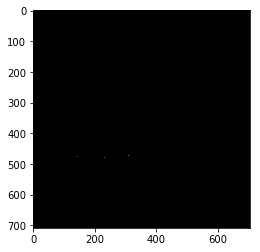

In [49]:
plt.imshow(intRatioVariance(r25,b25,1,True),cmap='gray')

print('Diferença entre as imagens: ',intRatioVariance(r25,g25))

<h3><center>Erro Quadrático Médio (MSE)</center></h3>

O Erro Quadrático Médio visa identificar diferenças entre imagens, ponderando com maior peso pontos nos quais possuem maior diferença. Pode-se definir esta equação conforme segue:

<center>$\Large MSE = \frac{1}{m n}\sum_{i=0}^{m-1}\sum_{j=0}^{n-1}[I_1(i,j) - I_2(i,j)]^2$</center>

no qual $I_1$ e $I_2$ representam as imagens sendo analisadas; $i$ e $j$ representam as posições da matriz; e $m$ e $n$ representam a quantidade de linha e coluna, respectivamente.

#### Características:
* É sempre realizado de forma binária
* As imagens necessitam ter o mesmo tamanho
* Quanto maior o valor apresentado, maior a diferença entre as imagens, ou seja, menos similares elas são.


Em python, a implementação segue da seguinte forma:

##### Implementação

In [50]:
def mse(I_1, I_2,returnImage=False):
    m,n = I_1.shape
    if returnImage:
        return normalizar((I_1.astype("float") - I_2.astype("float")) ** 2)
    else:
        erroMedio = np.sum((I_1.astype("float") - I_2.astype("float")) ** 2)
        erroMedio /= (float(m * n))
        return erroMedio

#### Limitações:
* Nem sempre uma grande valor de MSE não necessariamente significa que as imagens são completamente diferentes.

##### Teste de Conceito

In [51]:
ia = np.array([[2,3],[4,0]])
ib = np.array([[4,2],[1,1]])
valor = mse(ia,ib)
print(valor)



3.75


##### Aplicação em Imagens

Diferença entre as imagens:  412.329082041


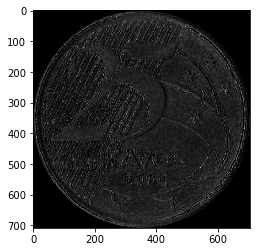

In [52]:
plt.imshow(mse(r25,g25,True),cmap='gray')

print('Diferença entre as imagens: ',mse(r25,g25))

<h3><center>Chi Squared</center></h3>

Chi Squared é uma métrica que avalia o histograma da imagem. Dada duas imagens $X$ e $Y$, os seus histogramas $x_i$ e $y_i$ serão utilizados para computar novos valores de bins e assim, soma-los para obter um valor unitário da imagem.
<center>$\Large \chi^2 = \sum_{i=0}^{255}\frac{(x_i-y_i)^2}{x_i+y_i}$</center>

##### Implementação

In [53]:
def chi_squared(Ia,Ib):
    hist_ia = np.histogram(Ia,256)[0]
    hist_ib = np.histogram(Ib,256)[0]
    chi_sq = ((hist_ia-hist_ib)**2)/(hist_ia+hist_ib)
    chi_sq[np.isnan(chi_sq)] = 0
    return np.sum(chi_sq)

##### Teste de Conceito

In [54]:
ia = np.array([[2,3,4],[3,4,5]])
ib = np.array([[2,2,4],[2,2,5]])
print(chi_squared(ia,ib))

4.13333333333


##### Aplicação em Imagens

In [55]:
#https://stats.stackexchange.com/questions/184101/comparing-two-histograms-using-chi-square-distance
print(chi_squared(r25,g25))

171586.96394


<h2><center>Aplicação</center></h2> 

<h3><center>Ranqueamento da Doença de Alzheimer</center></h3>

Neste exemplo, trataremos a recuperação de imagens médicas através da similaridade entre elas. Primeiramente, vamos ler todas as imagens da pasta e armazena-las em um único vetor de imagens, no qual chamaremos de images. A variável superMatrix é apenas m modo de exibir a informação, nada que altere a informação das imagens originais

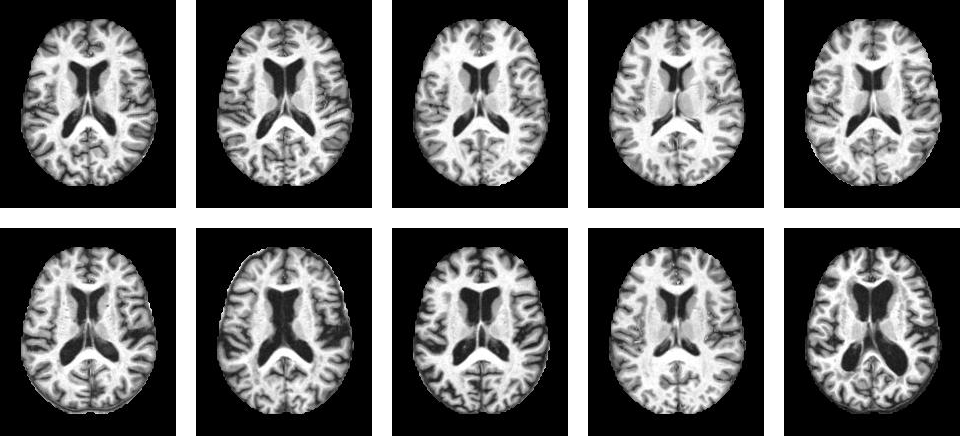

In [56]:
df = pd.read_table('img/alzheimer/imagens.txt',names=['files'])
files = df['files']

images = list()
for i in files:
    img = Image.open('img/alzheimer/'+i+'.jpg')
    images.append(np.array(img))

h,w = images[0].shape
superMatrix = np.ones((h*2+20,w*5+20*4))*255
for i in range(10):
    r,c = int(np.floor(i/5)),i%5
    inir,fimr, inic, fimc = int(r*h+20*r),h+int(r*h+20*r),int(c*w+20*c),w+int(c*w+20*c)
    superMatrix[inir:fimr,inic:fimc] = images[i]

image = Image.fromarray(superMatrix.astype('uint8'))
display(image)


Com as imagens já obtidas, será calculado a similaridade de todas com todas, ou seja, teremos a chamada Matriz de Similaridade, conforme vemos no exemplo abaixo.

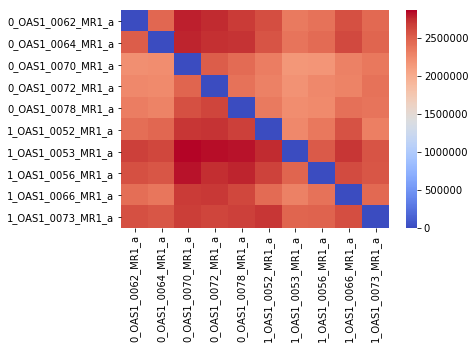

In [57]:
confusion_matrix = np.zeros((10,10))
plt.figure()
for i,j in itertools.product(range(10), range(10)):
        confusion_matrix[i,j] = np.sum(abs(np.ravel(images[i]-images[j])))
sns.heatmap(confusion_matrix,cmap='coolwarm',xticklabels=files,yticklabels=files)

Com todas as similaridades calculadas, para se obter um ranqueamento de interesse, ou seja, as imagens mais similares a uma determinada imagem de entrada (query), necessitaremos definir uma imagem base. Neste exemplo, foi escolhido a imagem 0_OAS1_0062_MR1_a. Nota-se, a primeira posição a imagem corresponde ao nível da doença (o motivo disso será explicado adiante).

In [58]:
cm = pd.DataFrame(confusion_matrix,columns=files,index=files)
query = '0_OAS1_0062_MR1_a'
sorted_query = cm.sort_values(query)[query]
print(sorted_query)

files
0_OAS1_0062_MR1_a          0.0
0_OAS1_0070_MR1_a    2221344.0
0_OAS1_0072_MR1_a    2263480.0
0_OAS1_0078_MR1_a    2335370.0
1_OAS1_0066_MR1_a    2419134.0
1_OAS1_0052_MR1_a    2421791.0
0_OAS1_0064_MR1_a    2524587.0
1_OAS1_0056_MR1_a    2586260.0
1_OAS1_0073_MR1_a    2587553.0
1_OAS1_0053_MR1_a    2663863.0
Name: 0_OAS1_0062_MR1_a, dtype: float64


Por fim, uma vez ordenado o vetor para uma imagem de consulta, identificaremos se as imagens obtidas foram de fato corretamente recuperadas ou não. Para isso, para cada iteração de imagens, nós realizaremos uma comparação da imagem de entrada com a imagem da iteração, olhando a classe da doença que aquela imagem está vinculada. Caso sejam da mesma classe (primeira posição da string query com a primeira posição da imagem analisada), o quadrado que circunda a imagem será verde, caso contrário, será vermelho. Além disso, a imagem query está representada em azul

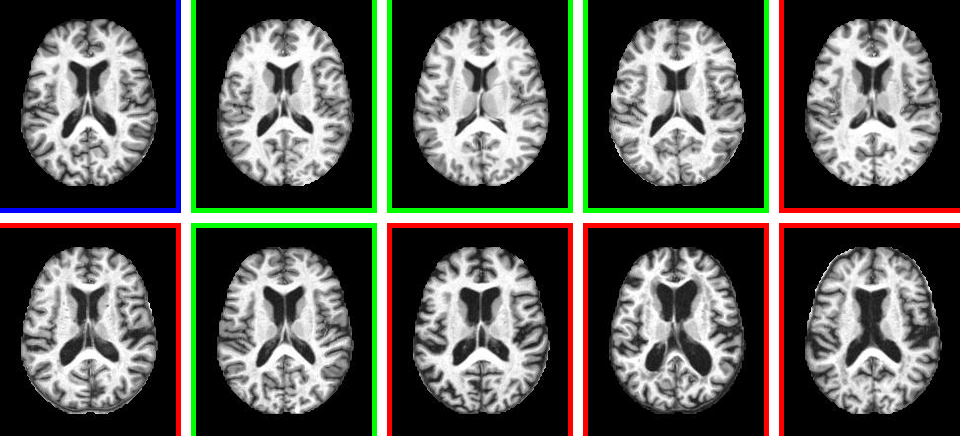

In [59]:
images = list()
for i in files:
    img = Image.open('img/alzheimer/'+i+'.jpg')
    images.append(np.array(img))

h,w = images[0].shape
superMatrix_r = np.ones((h*2+20,w*5+20*4))*255
superMatrix_g = np.ones((h*2+20,w*5+20*4))*255
superMatrix_b = np.ones((h*2+20,w*5+20*4))*255

for i in range(10):
    r,c = int(np.floor(i/5)),i%5
    #encontra posicoes
    inir,fimr, inic, fimc = int(r*h+20*r),h+int(r*h+20*r),int(c*w+20*c),w+int(c*w+20*c)
    
    classe = files[files==sorted_query.index[i]].iloc[0][0]
    #colorir quadrado query
    if i==0:
        superMatrix_r[inir-5 if inir != 0 else 0:fimr+5,inic-5 if inic != 0 else 0:fimc+5] = 0
        superMatrix_g[inir-5 if inir != 0 else 0:fimr+5,inic-5 if inic != 0 else 0:fimc+5] = 0
        superMatrix_b[inir-5 if inir != 0 else 0:fimr+5,inic-5 if inic != 0 else 0:fimc+5] = 255
    elif query[0] == classe:
    #colorir acertou

        superMatrix_r[inir-5 if inir != 0 else 0:fimr+5,inic-5 if inic != 0 else 0:fimc+5] = 0
        superMatrix_g[inir-5 if inir != 0 else 0:fimr+5,inic-5 if inic != 0 else 0:fimc+5] = 255
        superMatrix_b[inir-5 if inir != 0 else 0:fimr+5,inic-5 if inic != 0 else 0:fimc+5] = 0    
    #colorir errou
    else:
        superMatrix_r[inir-5 if inir != 0 else 0:fimr+5,inic-5 if inic != 0 else 0:fimc+5] = 255
        superMatrix_g[inir-5 if inir != 0 else 0:fimr+5,inic-5 if inic != 0 else 0:fimc+5] = 0
        superMatrix_b[inir-5 if inir != 0 else 0:fimr+5,inic-5 if inic != 0 else 0:fimc+5] = 0    
    
    #insere a imagem
    superMatrix_r[inir:fimr,inic:fimc] = images[files[files==sorted_query.index[i]].index[0]]
    superMatrix_g[inir:fimr,inic:fimc] = images[files[files==sorted_query.index[i]].index[0]]
    superMatrix_b[inir:fimr,inic:fimc] = images[files[files==sorted_query.index[i]].index[0]]

superMatrix = np.stack((superMatrix_r,superMatrix_g,superMatrix_b),axis=2)   
image = Image.fromarray(superMatrix.astype('uint8'))
display(image)

<h3><center>Avaliação das Métricas Propostas</center></h3>

##### Proposta
Neste exemplo será mostrado que a métrica de similaridade ou dissimilaridade depende do contexto e do conjunto de dados ao qual ela será aplicado. Para fins de demonstração, utilizaremos um dataset com imagens de animais, divididos em cinco grupos: Cachorro, Gato, Raposa, Tigre e Baleia. Dividiremos esta aplicação em duas subpartes, a primeira com o foco nas métricas de similaridade, e a segunda focando nas métricas de dissimilaridade.

##### Explicação do Código
Em Python existe uma estrutura chamada dicionário, nela é permitido armazenar diferentes tipos de informação. Para facilitar eventuais chamadas das funções de similaridade e dissimilaridade, foi criado um dicionário que basicamente agrupa tais funções. Desta forma, para acessar uma função de interesse $F(x)$, basta utilizar, por exemplo, a seguinte sintaxe: $vetor['F(x)'](Imagem_A,Imagem_B)$. Este procedimento contorna a necessidade de chamar função a função de forma manual.

Além disso, conforme efetuado na aplicação do Ranqueamento das imagens de Alzheimer, iremos gerar basicamente dois vetores importantes, que serão utilizados no decorrer do processo:
1. files:  Este vetor armazena o nome das imagens que serão lidas pela função Image.open
2. images: Este vetor contem todas as imagens lidas de acordo com o vetor anterior, assim, para acessar uma matrix, basta realizar a seguinte sintaxe: $images[x]$


* OBS: A variável superMatrix é apenas um modo de plotagem da figura que apresenta as imagens lidas durante todo o processo.

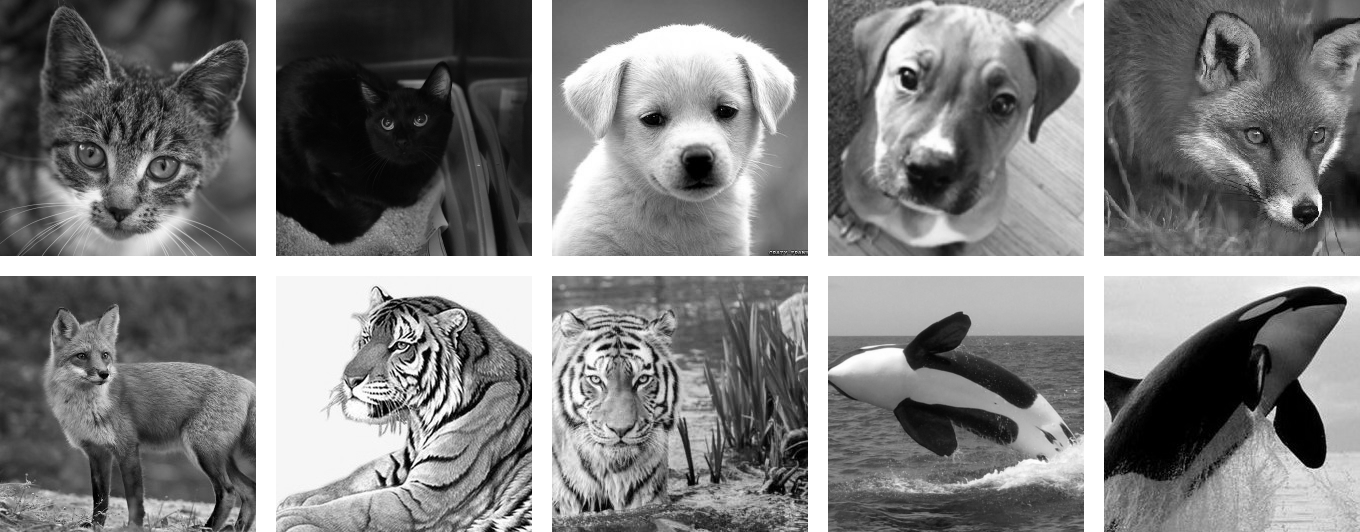

In [60]:
df = pd.read_table('img/animais/animais.txt',names=['files'])
files = df['files']

images = list()
for i in files:
    img = Image.open('img/animais/'+i+'.jpg')
    images.append(np.array(img.convert('L'))/1.)

h,w = images[0].shape
superMatrix = np.ones((h*2+20,w*5+20*4))*255
for i in range(10):
    r,c = int(np.floor(i/5)),i%5
    inir,fimr, inic, fimc = int(r*h+20*r),h+int(r*h+20*r),int(c*w+20*c),w+int(c*w+20*c)
    superMatrix[inir:fimr,inic:fimc] = images[i]

image = Image.fromarray(superMatrix.astype('uint8'))
display(image)

#print(tanimoto(images[0],images[1]))
#for i in dissim_func:
#    print(dissim_func[i](images[0],images[1]))


Além disso, outro ponto importante é: Assim como realizado na primeira aplicação, o uso de uma image query se faz necessária. Contudo, ao invés de definir por posição de vetor qual imagem será a de query, será utilizado o nome dela. Assim, tornando o procedimento mais viável ao usuário.

<class 'pandas.core.series.Series'>


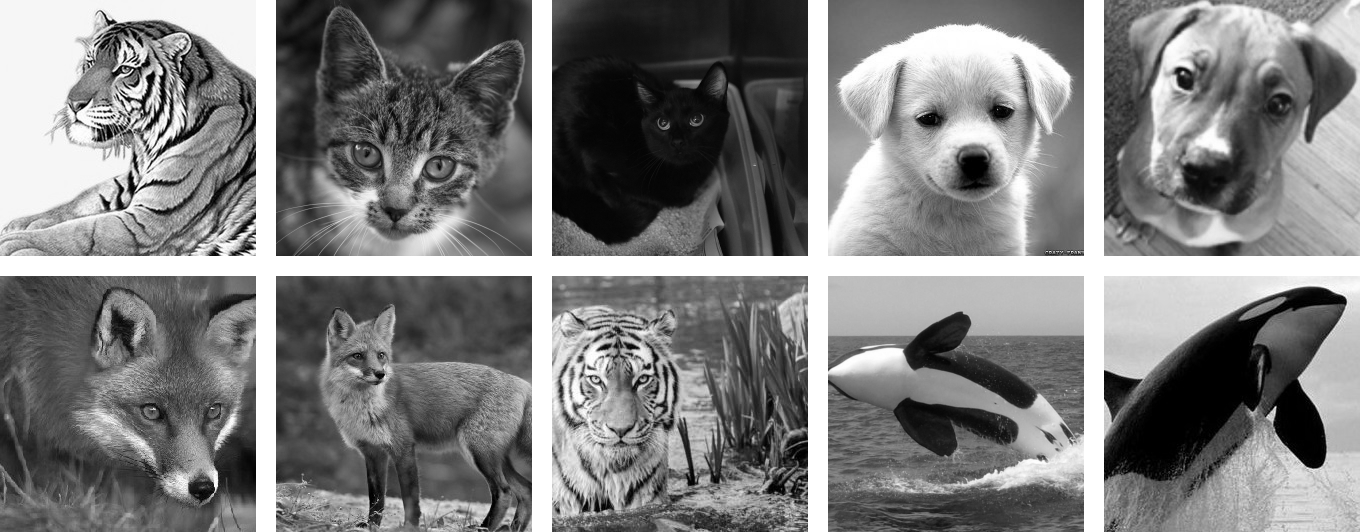

In [61]:
nomeDaImagem = 'tiger1'
print(type(files))
posicao = np.where(files==nomeDaImagem)[0][0]
query = images[posicao]

if   posicao == 0:
    image_new = images[1:]
    file_new  = files[1:]
elif posicao == len(images)-1:
    image_new = images[:-1]
    file_new  = files[:-1]
else:
    image_new = np.concatenate((images[0:posicao],images[posicao+1:]))
    file_new  = np.concatenate((files[0:posicao],files[posicao+1:]))

h,w = images[0].shape
superMatrix = np.ones((h*2+20,w*5+20*4))*255
for i in range(10):
    r,c = int(np.floor(i/5)),i%5
    inir,fimr, inic, fimc = int(r*h+20*r),h+int(r*h+20*r),int(c*w+20*c),w+int(c*w+20*c)
    if i == 0:
        superMatrix[inir:fimr,inic:fimc] = query
    else:
        superMatrix[inir:fimr,inic:fimc] = image_new[i-1]

image = Image.fromarray(superMatrix.astype('uint8'))
display(image)





Agora, voltaremos nosso foco para o modo de mensurar o relacionamento das imagens.

<h4><center>Avaliação das Métricas Propostas - Similaridade</center></h4>

Conforme explicitado no começo desta seção, o dicionário visa facilitar a chamada das funções dentro do python. Neste bloco de código abaixo, iremos relacionar todas as imagens do banco com a imagem query, utilizando todas as funções que definimos no decorrer deste notebook.

In [62]:

sim_func = { 'Pearson':  pearson
           , 'Tanimoto': tanimoto
           , 'ssC': ssC
           , 'dsC': dsC
           , 'Min Ratio': min_ratio
           , 'Rho': spRho
           , 'Tau': tau
           , 'Shannon': shannon_mutual
           , 'Renyi': renyi_mutual
           #, 'Tsallis': tsallis_mutual
           }
matrix = np.zeros((len(sim_func),len(images)-1))

sim_keys = list(sim_func.keys())
for i, func in enumerate(sim_func):
    for j, image in enumerate(image_new):
         matrix[i,j] = sim_func[func](query,image)

Após a obtenção dos valores das métricas, seria injusto calcula-las métrica contra métrica, pois os modos de ponderação são distintos. Por isso, utilizaremos uma das definições de Métrica de Similaridade. Sabemos que a maior similaridade está na relação de uma imagem com ela mesma (Reflexividade). Entrentanto, para alcançar o nível máximo, outras imagens com um certo indice de similaridade alcançaram valores elevados também. Por isso, dentro de cada métrica, realizaremos um ranqueamento (0-menor similaridade,8-maior) para futuramente delegarmos como será nossa recuperação de imagens por conteúdo.

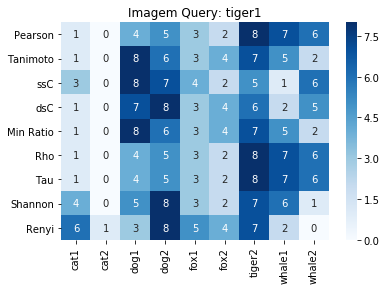

In [63]:
#print(matrix)
matrixRanked = np.argsort(np.argsort(matrix))
#matrixRanked

ax = plt.axes()
sns.heatmap(matrixRanked,cmap='Blues',xticklabels=file_new,yticklabels=list(sim_func.keys()),annot=True,ax=ax)
ax.set_title('Imagem Query: '+nomeDaImagem)
plt.show()

Ao analisar a imagem acima, escolheremos a que apresenta o ranqueamento desejado, lembrando que parte de 8 até 0 em nosso caso (maior para menor). Assim, escolheremos manuamente o nome da função e o programa irá delinear como ficou o ranqueamento da imagem para aquela métrica. (Lembrete: tente utilizar o nível 8 na mesma categoria de animal que você escolheu como query).

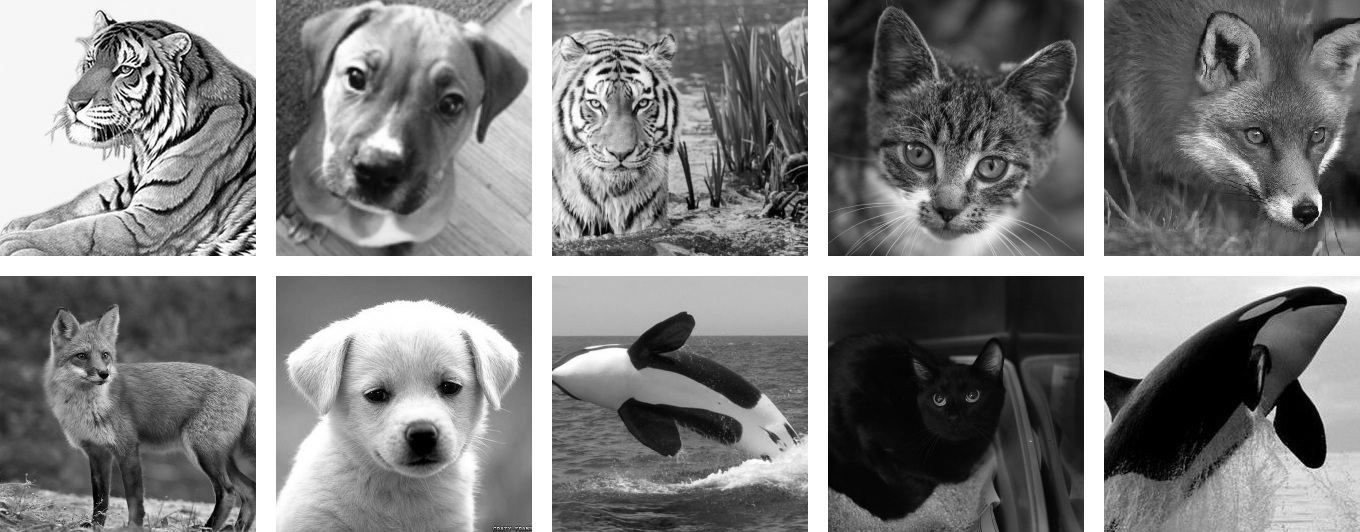

In [64]:
nomeDaFuncao = 'Renyi'
se = pd.Series(sim_keys)
posicaoFunc = np.where(se==nomeDaFuncao)[0][0]

vetDaMetricaEscolhida = matrixRanked[posicaoFunc]

h,w = images[0].shape
superMatrix = np.ones((h*2+20,w*5+20*4))*255
for i in range(10):
    r,c = int(np.floor(i/5)),i%5
    inir,fimr, inic, fimc = int(r*h+20*r),h+int(r*h+20*r),int(c*w+20*c),w+int(c*w+20*c)
    if i == 0:
        superMatrix[inir:fimr,inic:fimc] = query
    else:
        vetDaMetricaEscolhida = matrixRanked[posicaoFunc]
        posicaoPrint = np.where(vetDaMetricaEscolhida==(len(image_new)-(i)))[0][0]
        superMatrix[inir:fimr,inic:fimc] = image_new[posicaoPrint]

image = Image.fromarray(superMatrix.astype('uint8'))
display(image)

<h4><center>Avaliação das Métricas Propostas - Dissimilaridade</center></h4>

Apesar da dissimaridade conceitualmente ser o oposto da similaridade, ao realizar a codificação o processo é praticamente o mesmo. Por isso, detalharei apenas os pontos que apresentarem divergência, ou que necessitarem ser ressaltados.

In [65]:
dissim_func = { 'L1 Norm': l1_norm
              , 'MAD': mad
              , 'L2 Norm': l2_norm
              , 'MSD': msd
              , 'L22 Norm': norm_l22
              , 'Ratio Var': intRatioVariance
              , 'MSE': mse
              , 'Chi Squared': chi_squared
              }

matrix = np.zeros((len(dissim_func),len(images)-1))

dissim_keys = list(dissim_func.keys())
for i, func in enumerate(dissim_func):
    for j, image in enumerate(image_new):
         matrix[i,j] = dissim_func[func](query,image)

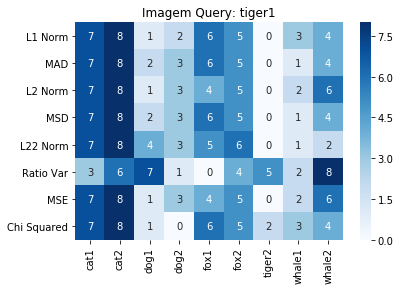

In [66]:
matrixRanked = np.argsort(np.argsort(matrix))

ax = plt.axes()
sns.heatmap(matrixRanked,cmap='Blues',xticklabels=file_new,yticklabels=list(dissim_func.keys()),annot=True,ax=ax)
ax.set_title('Imagem Query: '+nomeDaImagem)
plt.show()

Mudança: Neste ponto, ao invés de buscarmos os maiores valores na variável matrix (métricas de similaridade), buscaremos os menores, pois quanto menor a distância, maior a similaridade entre as imagens.

6


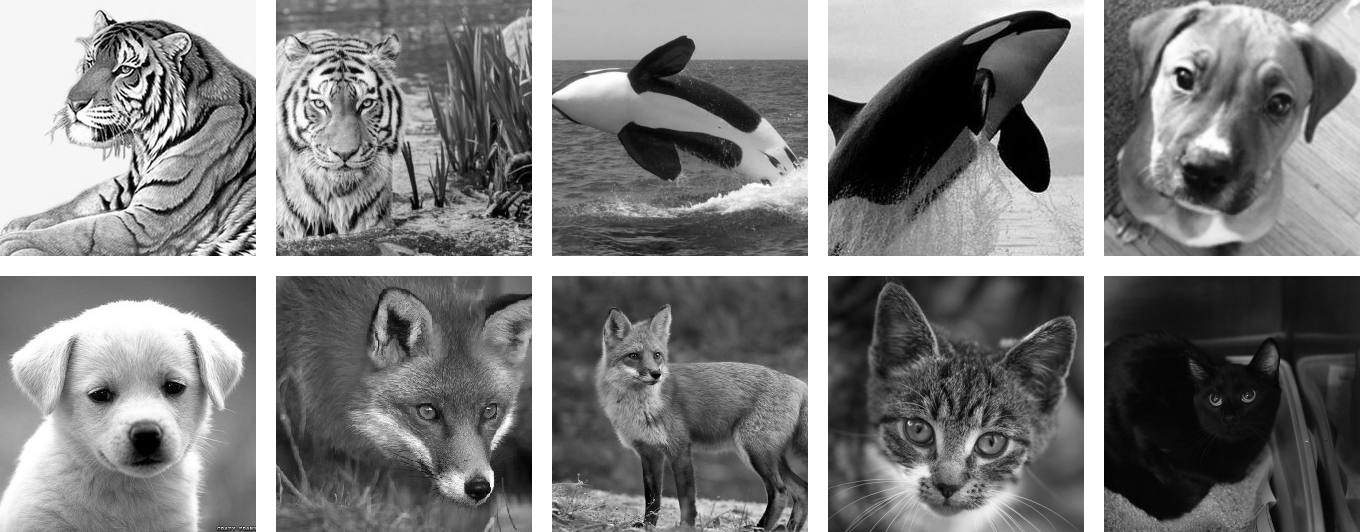

In [67]:
nomeDaFuncao = 'L22 Norm'
se = pd.Series(dissim_keys)
posicaoFunc = np.where(se==nomeDaFuncao)[0][0]

vetDaMetricaEscolhida = matrixRanked[posicaoFunc]
print(np.where(vetDaMetricaEscolhida==0)[0][0])

h,w = images[0].shape
superMatrix = np.ones((h*2+20,w*5+20*4))*255
for i in range(10):
    r,c = int(np.floor(i/5)),i%5
    inir,fimr, inic, fimc = int(r*h+20*r),h+int(r*h+20*r),int(c*w+20*c),w+int(c*w+20*c)
    if i == 0:
        superMatrix[inir:fimr,inic:fimc] = query
    else:
        vetDaMetricaEscolhida = matrixRanked[posicaoFunc]
        posicaoPrint = np.where(vetDaMetricaEscolhida==(i-1))[0][0]
        superMatrix[inir:fimr,inic:fimc] = image_new[posicaoPrint]

image = Image.fromarray(superMatrix.astype('uint8'))
display(image)

<h3><center>Referências</center></h3>

<p><div class="lev1 toc-item"><a href="https://dl.acm.org/citation.cfm?id=2825921"><span class="toc-item-num">[1]&nbsp;&nbsp;</span>A. Ardeshir Goshtasby. 2012. Image Registration: Principles, Tools and Methods. Springer Publishing Company, Incorporated</a></div><div class="lev1 toc-item"><a href="https://www.onlinejournal.in/IJIRV2I7/003.pdf"><span class="toc-item-num">[2]&nbsp;&nbsp;</span>Bhowmik, Soumen and Anirban Jash. 2016. A Literature Survey on Similarity and Dissimilarity of Digital Images.</a></div><div class="lev1 toc-item"><a href="https://en.wikipedia.org/wiki/Structural_similarity"><span class="toc-item-num">[3]&nbsp;&nbsp;</span>Structural Similarity</a></div><div class="lev1 toc-item"><a href="https://en.wikipedia.org/wiki/Chi-squared_test"><span class="toc-item-num">[4]&nbsp;&nbsp;</span>Chi Squared</a></div><div class="lev1 toc-item"><a href="http://www.idi.ntnu.no/emner/tdt03/Presentations2017/similarity_measures-Isachsen.pdf"><span class="toc-item-num">[5]&nbsp;&nbsp;</span>Apresentação Similarity and Dissimilarity Measures</a></div><div class="lev1 toc-item"><a href="https://ccrg.rit.edu/~whelan/courses/2010_4wi_1016_345/notes05.pdf"><span class="toc-item-num">[6]&nbsp;&nbsp;</span>Joint Probability Distribution (JPD)</a></div>